In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
iris = datasets.load_iris()

In [ ]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: ylabel='target'>

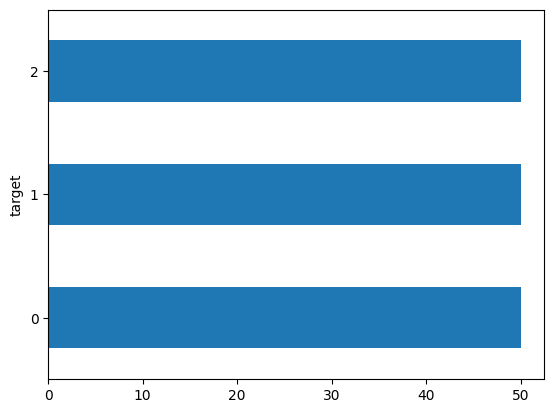

In [ ]:
df.groupby('target').size().plot(kind='barh')

In [ ]:
def dis(a, b, p=2):
    l = len(a)
    d = 0
    for i in range(l):
        d += abs(a[i] - b[i]) ** p
    d = d ** (1/p)
    return d

In [ ]:
X = df.drop('target', axis=1)
y = df.target
test_pt = [4.8, 2.7, 2.5, 0.7]
distances = []
for i in X.index:
    a = dis(test_pt, X.iloc[i])
    distances.append(a)
dists = pd.DataFrame(data=distances, index=X.index, columns=['dist'])
dists.head()

<ipython-input-7-e8f484fbe147>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d += abs(a[i] - b[i]) ** p


,dist
0,1.479865
1,1.249000
2,1.396424
3,1.204159
4,1.519868


In [ ]:
def knn_sort(k,dists): return dists.sort_values(by = 'dist')[:k]

In [ ]:
sorted_dists = knn_sort(5, dists)
print(sorted_dists)

        dist
98  0.734847
57  0.911043
93  0.964365
24  1.048809
23  1.063015


In [ ]:
count_set = {}
for i in sorted_dists.index:
    if y[i] not in count_set:
        count_set[y[i]] = 1
    else:
        count_set[y[i]] += 1

print(max(count_set))

1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
def KNN(X_train, X_test, y_train, y_test, k, p):
    y_predict = []
    for test_pt in X_test:
        distances = []
        for i in X_train:
            a = dis(test_pt, i, p)
            distances.append(a)
        dists = pd.DataFrame(data=distances, index=y_train.index, columns=['dist'])
        sorted_dists = knn_sort(k, dists)

        count_set = {}
        for i in sorted_dists.index:
            if y_train[i] not in count_set:
                count_set[y_train[i]] = 1
            else:
                count_set[y_train[i]] += 1
        y_predict.append(max(count_set))
    y = y_test.tolist()
    accr = 0
    for i in range(len(y)):
        if y[i] == y_predict[i]:
            accr += 1
    return accr/len(y)


In [ ]:
KNN(X_train, X_test, y_train, y_test, 3,2)

0.9473684210526315

0.9736842105263158


Text(0, 0.5, 'Accuracy (%)')

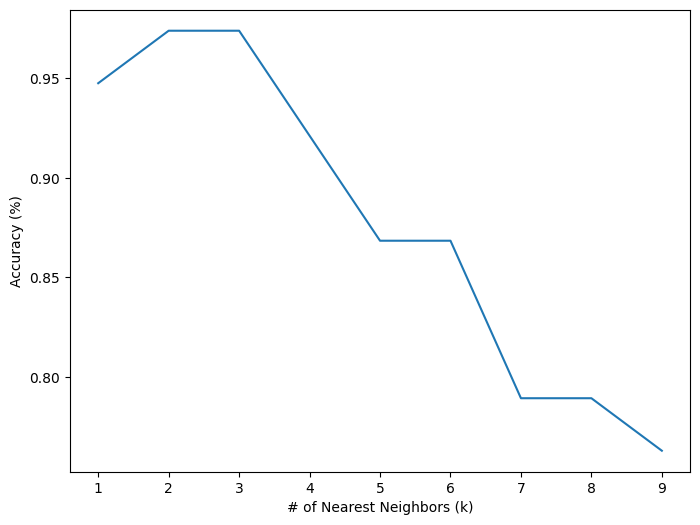

In [ ]:
accuracies = []
for i in range(1,10):
    accuracies.append(KNN(X_train, X_test, y_train, y_test, i,1))

print(max(accuracies))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,10), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)')